<a href="https://colab.research.google.com/github/Rick-Rice/DATA110/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Assignment: Data Manipulation and Visualization with Pandas and Matplotlib

#### Objective:
The goal of this assignment is to enhance your skills in data manipulation and visualization using Python, specifically through the pandas and matplotlib libraries. You will work with the penguins dataset to apply filtering, sorting, grouping, and visualization techniques learned this week.

#### Dataset:
The dataset you will be using is the `penguins` dataset, which contains various measurements for three species of penguins from different islands in Antarctica.

#### Tasks:

1. **Data Exploration**:
   - Load the penguins dataset using seaborn's `load_dataset` function. If seaborn is not installed
   - Display the first 10 rows of the dataset to understand its structure.
   - Use the `.describe()` method to get a statistical summary of the numerical columns in the dataset.

2. **Data Filtering**:
   - Filter the dataset to include only those penguins with a body mass greater than 4000 grams. Store this subset in a new DataFrame and display the first 5 rows.

3. **Conditional Filtering**:
   - Create a subset of the data where the penguin's bill length is between 40 mm and 50 mm, and the bill depth is less than 18 mm. Display the shape of the resulting DataFrame.

4. **Data Grouping and Aggregation**:
   - Group the dataset by `species` and `island`, and calculate the average `flipper_length_mm` for each group. Sort the results in descending order of flipper length.

5. **Advanced Visualization**:
   - Create a histogram to visualize the distribution of penguin body masses. Use different colors to differentiate between the species. Ensure your histogram is clearly labeled with a title, x-axis and y-axis labels, and a legend.

6. **Utilizing Loops for Visualization**:
   - Using the `zip` function learned this week, write a loop to create a separate histogram for each island showing the distribution of flipper lengths. Ensure each histogram has a title indicating the island being visualized, and clearly label your axes.

#### Submission Requirements:
- Submit a Jupyter notebook ( or google colab) containing the completed tasks, including comments explaining your code where necessary.

## 1. Data Exploration:

In [1]:

import seaborn as sns

# Load the penguins dataset from seaborn's built-in datasets and assign it to the variable 'penguins'
penguins = sns.load_dataset("penguins")

# Display the first ten rows of the dataframe to get a quick overview of the dataset structure and initial data points
print(penguins.head(10))

# Describe the penguins DataFrame
penguins.describe()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## 2. Data Filtering

In [2]:
# Find penguins heaver than 4 kg


df = penguins[penguins['body_mass_g']>4000]

df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male


## 3 Conditional Filtering

In [3]:


df2 = penguins[(penguins['bill_length_mm'] > 40) & (penguins['bill_length_mm'] < 50 ) & (penguins['bill_depth_mm'] < 18) ]


df2.shape

(129, 7)

## 4. Data Grouping and Aggregation

In [4]:
# This works

penguins.groupby(['species','island']) ['flipper_length_mm'].mean().sort_values(ascending=False)

species    island   
Gentoo     Biscoe       217.186992
Chinstrap  Dream        195.823529
Adelie     Torgersen    191.196078
           Dream        189.732143
           Biscoe       188.795455
Name: flipper_length_mm, dtype: float64

In [5]:
# This doesn't

penguins.sort_values('flipper_length_mm',ascending=False).groupby(['species','island']).mean()

<ipython-input-5-80fdb09cdb35>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguins.sort_values('flipper_length_mm',ascending=False).groupby(['species','island']).mean()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe          38.975000      18.370455         188.795455   
          Dream           38.501786      18.251786         189.732143   
          Torgersen       38.950980      18.429412         191.196078   
Chinstrap Dream           48.833824      18.420588         195.823529   
Gentoo    Biscoe          47.504878      14.982114         217.186992   

                     body_mass_g  
species   island                  
Adelie    Biscoe     3709.659091  
          Dream      3688.392857  
          Torgersen  3706.372549  
Chinstrap Dream      3733.088235  
Gentoo    Biscoe     5076.016260

## 5. Advanced Visualization

Create a histogram to visualize the distribution of penguin body masses. Use different colors to differentiate between the species. Ensure your histogram is clearly labeled with a title, x-axis and y-axis labels, and a legend.

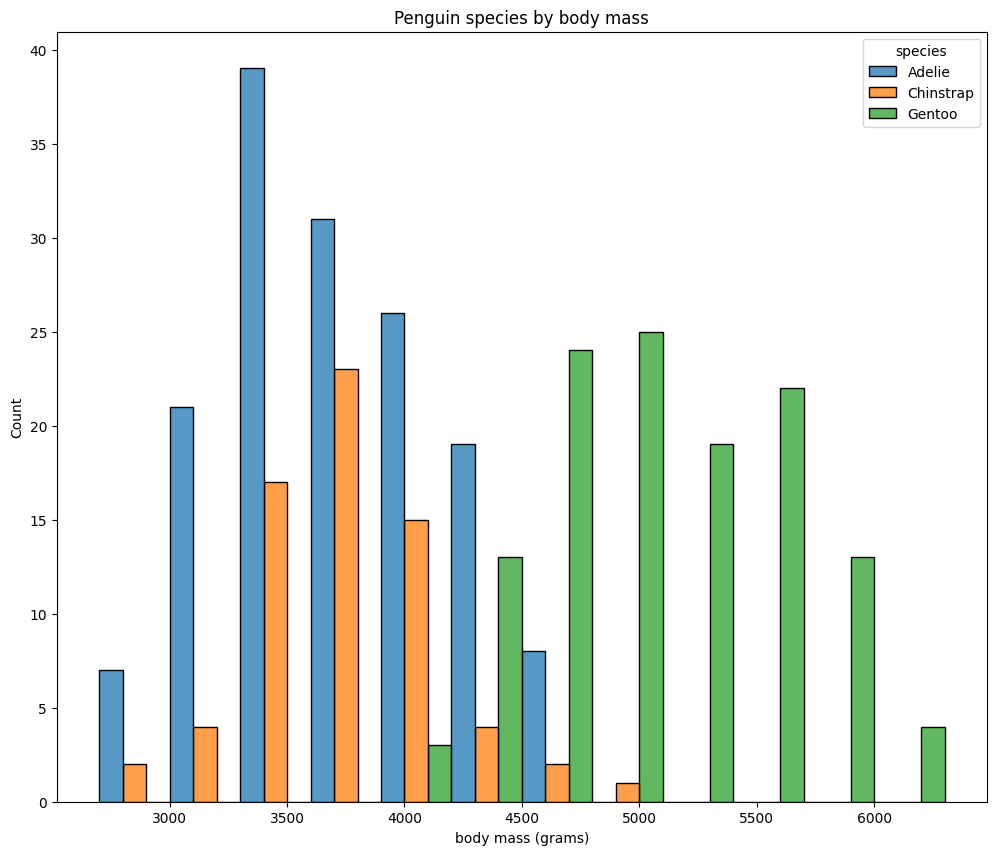

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))

sns.histplot(data=penguins,x='body_mass_g',hue='species',multiple='dodge',
             bins=12).set(title='Penguin species by body mass',xlabel='body mass (grams)')

plt.show()


## 6. Utilizing Loops for Visualization

Using the zip function learned this week, write a loop to create a separate histogram for each island showing the distribution of flipper lengths. Ensure each histogram has a title indicating the island being visualized, and clearly label your axes.


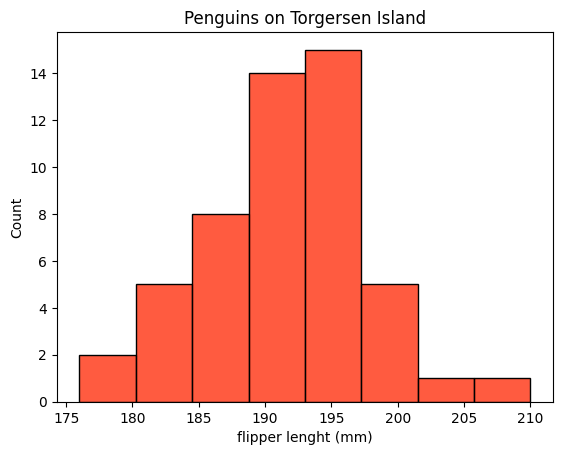

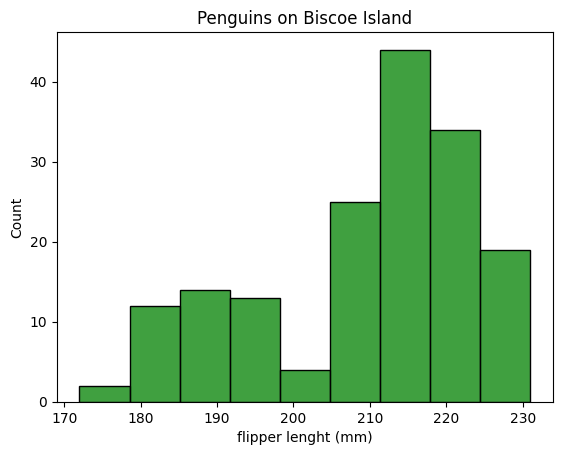

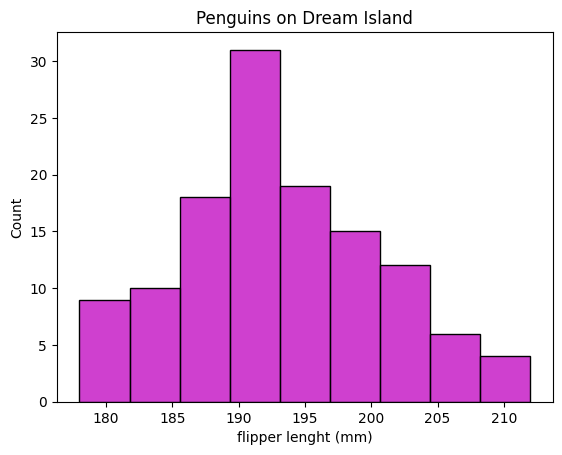

In [7]:

colors = ['#FF2400', 'green', 'm']
unique_islands = penguins['island'].unique()

for island, color in zip(unique_islands, colors):

  subset = penguins[penguins['island'] == island]

  sns.histplot(data=subset,x='flipper_length_mm',color=color,
               label=island).set(title='Penguins on '+island+' Island',xlabel='flipper lenght (mm)')

  plt.show()





